# Занятие 5

## Введение

Всем привет! Здесь будет материал пятого занятия. 

Сегодня мы поговорим о таком понятии, как *регрессия*, а точнее говоря о *регрессионном аналзизе*.

### Постановка задачи.

Традиционная постановка задачи для регрессионного анализа может быть сформулирована следующим образом.

Пусть есть интересующий нас показатель $Y$, который как-то функционально зависит от переменных $X_1, \dots, X_m$, при этом эта зависимость может быть каким-либо образом искажена некоторыми случайными помехами или, как правильнее говорить, шумом. Нам надо найти эту зависимость и сделать как можно более точное *предсказание* $Y$ на основе измеряемых *предикторных* переменных $X_1, \dots, X_m$.

## Часть 1. Подгонка прямой.

Пусть есть облако эксперементальных точек $(x_i, \eta_i)$, полученных в соответсвии с моделью

$$
\eta_i = a + b x_i + \varepsilon_i, \quad i = 1, \dots, n.
$$

> При этом в нашем конкретном случае мы видим линейную зависимость, но в более общем случае мы можем взять некоторое произвольное параметрическое семейство функций $f(x, T),$ где $T$ – набор параметров. Тогда можем написать следующее выражение: $\eta_i = f(x, T) + \varepsilon_i$.

В нашем же случае коэффициенты прямой $a$ и $b$ – неизвестные параметры, $x_i$ – значения предиктора (которые неслучайны), $\varepsilon_i$ – независимые и одинаково распределённые случайные ошибки с нулевым средним, т. е. $\mathbb{E}\varepsilon_i = 0$.

Интерпретируя исходную постановку задачи на наш конкретный случай, мы понимаем, что нам как раз и нужно отыскать коэффициенты $a$ и $b$. Как же это можно сделать?

## Часть 2. Метод наименьших квадратов (МНК).

Построим пробную прямую $y = \alpha + \beta x$. При этом остатки можно определить как $\delta(\alpha, \beta) = \eta_i - \alpha - \beta x_i.$

Нам нужно как-то измерить качество нашей пробной прямой, т. е. понять, насколько хорошо она приближает исходное облако точек $(x_i, \eta_i)$. В качестве общей меры близости предлагается взять следущую меру

$$
F(\alpha, \beta) = \sum_{i = 1}^{n} \delta_i^2 = \sum_{i = 1}^{n}(\eta_i - \alpha - \beta x_i)^2.
$$

Таким образом, нам надо минимизировать данный функционал. Обозначим через $(\hat{a}, \hat{b})$ точку минимума. Оказывается, что они имеют вид

$$
\hat{b} = \dfrac{\sum_{i = 1}^{n}(\eta_i - \overline{\eta})(x_i - \overline{x})}{\sum_{i = 1}^{n}(x_i - \overline{x})^2}, \qquad \hat{a} = \overline{\eta} - \hat{b} \overline{x}.
$$

Нельзя не упомянуть один из существенных недостатков метода наименьших квадратов: данный метод обладает сильной чувствительностью к выбросам (наблюдениям, которые выбиваются из общего облака точек).

> Контрольный вопрос: почему?

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)
df = pd.read_excel("../Data/Linear.xlsx")
display(df)

,Алкины,Пик,Бензол,Экст,Дан,Рез,Станд,Энзим,T(C),Раств
0,0.09,3.2,0.2,0.20,9.5,12.08,10.2,10.2,0,33.5
1,0.14,4.7,0.5,0.37,19.0,19.42,20.3,20.5,10,37.0
2,0.18,5.9,1.0,0.64,28.5,28.64,29.8,30.9,20,41.2
3,0.25,7.7,1.5,0.93,38.0,37.87,40.1,41.3,30,46.1
4,0.30,9.1,2.0,1.22,47.5,46.37,49.8,51.2,40,50.0
5,0.35,10.7,2.5,1.50,95.0,93.12,NaN,NaN,50,52.9
6,NaN,NaN,3.0,1.80,142.5,139.50,NaN,NaN,60,56.8
7,NaN,NaN,NaN,NaN,190.0,185.96,NaN,NaN,70,64.3
8,NaN,NaN,NaN,NaN,237.0,232.95,NaN,NaN,80,69.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Алкины  6 non-null      float64
 1   Пик     6 non-null      float64
 2   Бензол  7 non-null      float64
 3   Экст    7 non-null      float64
 4   Дан     9 non-null      float64
 5   Рез     9 non-null      float64
 6   Станд   5 non-null      float64
 7   Энзим   5 non-null      float64
 8   T(C)    9 non-null      int64  
 9   Раств   9 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 848.0 bytes


**Легенда к заданию.**

* Для построения градуировочного графика при определении алкинов прямым термометрическим методом получены данные:
    * **Алкины** – содержание алкинов (%),
    * **Пик** – высота пика (в см).
    
* Для градуировки фотометрического определения бензола в ультрафиолетовой части спектра были измерены экстинкции (поглощения) семи эталонных проб известного содержания:
    * **Бензол** – содержания бензола (г/л),
    * **Экст** – экстинкция.
    
* Для изучения систематических ошибок при определении сульфата методом объемного анализа представлены результаты:
    * **Дан** – данные,
    * **Рез** – результат.
    
* Проведено определение лактата стандартным методом и с помощью энзимного электрода (в моль/л):
    * **Станд** – стандартным методом,
    * **Энзим** – энзимным электродом.
    
* Зависимость растворимости тиосульфата натрия в воде от температуры:
    * **Т(С)** – температура,
    * **Раств** – растворимость (%).

Построим диаграму зависимости **Пик** от **Алкины**, но сначала соберём нужные данны в один датафрейм.

In [3]:
dfAlkPic = df[['Пик', 'Алкины']].dropna()
display(dfAlkPic)

,Пик,Алкины
0,3.2,0.09
1,4.7,0.14
2,5.9,0.18
3,7.7,0.25
4,9.1,0.30
5,10.7,0.35


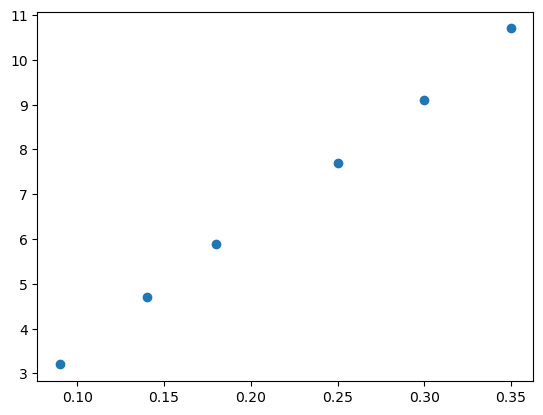

In [4]:
plt.scatter(dfAlkPic['Алкины'], dfAlkPic['Пик'])
plt.show()

Что мы видим? Очень хорошую, практически линейную зависимость. Но как же нам найти ту самую линейную регрессию? Для этого нам надо найти коэффициенты.

Для нахождения коэффициентов прямой мы будем использовать уже знакомый вам метод `np.polyfit()`. Давайте сделаем это, а заодно и выведем уравнение искомой прямой.

In [5]:
coefs = np.polyfit(dfAlkPic['Алкины'], dfAlkPic['Пик'], 1)
polynom = np.poly1d(coefs)
print(polynom)

 
28.34 x + 0.6966


Теперь соберём всё на одну картинку.

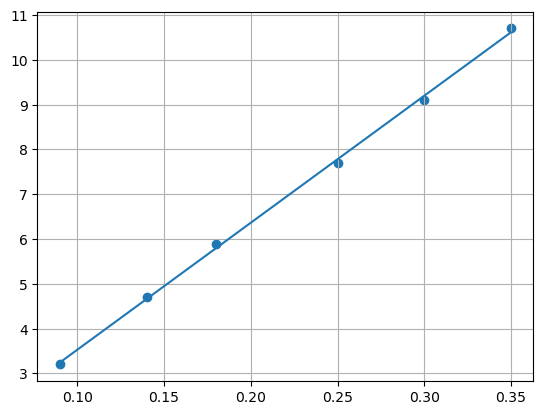

In [6]:
plt.scatter(dfAlkPic['Алкины'], dfAlkPic['Пик'])
plt.plot(dfAlkPic['Алкины'], polynom(dfAlkPic['Алкины']))
plt.grid()
plt.show()

Подтверждаем то, что заметили раньше – укладка почти линейная.

### Ещё один метод.

Ещё один метод выполнения линейной регрессии состоит в использовании библиотеки `sklearn.linear_model`. (Снова может быть так, что у вас отсутствует данная библиотека, в этом случае вам поможет `pip`).

In [7]:
from sklearn.linear_model import LinearRegression

Здесь есть один нюанс. Какой тип у объекта `dfAlcPic['Пик']`?

In [8]:
type(dfAlkPic['Пик'])

pandas.core.series.Series

Как мы видим, `series`. Но нам понадобится объект типа `arrays`. Изменим типы и зададим переменные для более удобного обращения к ним в дальнейшем. Также обратите внимание на конструкуцию `.reshape(-1, 1)` – что она делает?

In [9]:
alc = dfAlkPic['Алкины'].values.reshape(-1, 1)
pic = dfAlkPic['Пик'].values

Зададим теперь нужную нам модель и выполним подгонку.

In [10]:
model = LinearRegression()
model.fit(alc, pic)

LinearRegression()

> Если бы мы не сделали `.reshape(-1, 1)`, то функция `.fit()` вернула бы ошибку. Попробуйте запустить её без `.reshape(-1, 1)`.

Попробуем предсказать поведение нашей регрессии в двух "соседних" от построенного графика точках: $0.05, 0.40$.

In [11]:
sample = np.array([0.05, 0.40]).reshape(-1, 1)

In [12]:
pred = model.predict(sample)

In [13]:
print(model.coef_)
print(model.intercept_)
print(pred)

[28.33616299]
0.6966044142614587
[ 2.11341256 12.03106961]


Что мы только что получили? Первые два вывода соответствуют неизвестным коэффициентам в уравнении прямой – сравните их с результатами выше. Последний вывод соответствуют "предсказанию" значений нашей регрессии в заданных точках.

> Кстати, почему первый вывод – список?

Соберём всё на одну картинку.

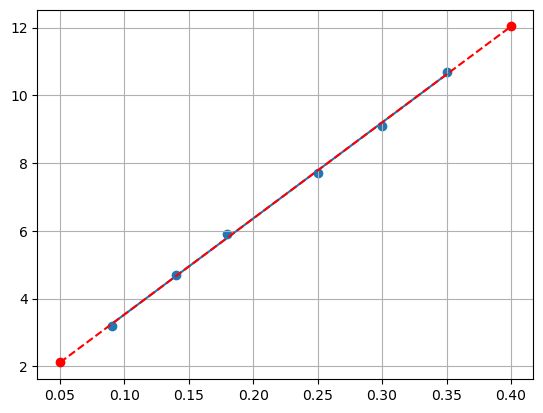

In [14]:
plt.scatter(dfAlkPic['Алкины'], dfAlkPic['Пик'])
plt.plot(dfAlkPic['Алкины'], polynom(dfAlkPic['Алкины']))
plt.plot([0.05, 0.40],pred, 'ro--')
plt.grid()
plt.show()

Разумеется, в рамках этого занятия мы не сможем даже примерно описать библиотеку [`scikit-learn`](https://scikit-learn.org/stable/). Но теперь вы знаете, что она существует. Стоит сказать, что это одна из самых часто используемых библиотек по для анализа данных и машинного обучения.

Снова можете сказать: "Хорошо, допустим, что прямую мы построили. Но как быть, если я не верю своим глазам?" Это очень правильный вопрос. Этот вопрос можно даже расширить: "Как понять, что построенная мной модель, хороша?" Ответ простой: "Нужно использовать метрики, которые отражают качество построенной модели."

Нам "повезло" с тем, что наша модель очень простая. Но тем не менее, даже с её помощью мы можем проиллюстрировать общий подход.

Величина $R^2$ (величина достоверности аппроксимации) измеряется в диапазоне от $0$ до $1$. Чем ближе он к единице, тем точнее наша регрессия. При этом если она далека от единицы, то это вовсе не означает, что мы построили какую-то плохую регрессию – в реальных задачах это может обхясняться наличием других влияющих факторов. При этом если данная величина оказывается очень близкой к нулю, то это означает отсутствие влияния данного фактора – и следовательно, проведение регрессии по нему бесполезно.

Давайте вычислим этот коэффициент для нашей модели. (При этом мы очень подозреваем, что он будет близок к $1$).

In [15]:
from sklearn.metrics import r2_score
R2 = r2_score(pic, model.predict(alc))
print(R2)

0.9990505730526149


Что и требовалось доказать.

## Часть 2. Изучение ошибок для некоторого метода.

Рассмотрим два других столбца таблицы. Сделаем для них всё то же, что делали выше.

In [16]:
dan = df['Дан']
res = df['Рез']

 
0.9749 x + 1.02


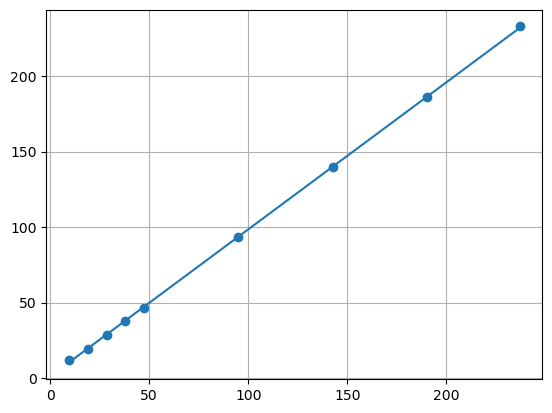

In [17]:
coefs = np.polyfit(dan, res, 1)
polynom = np.poly1d(coefs)
print(polynom)

plt.scatter(dan, res)
plt.plot(dan, polynom(dan))
plt.grid()
plt.show()

In [18]:
danArr = dan.values.reshape(-1, 1)
resArr = res.values

model = LinearRegression()
model.fit(danArr, resArr)

R2 = r2_score(resArr, model.predict(danArr))
print(model.coef_)
print(model.intercept_)
print(R2)

[0.97488549]
1.019711977811781
0.9998922473302879


Так как наша прямая имеет вид $y = \texttt{.coef }  x + \texttt{.intercept} = ax + b$, то значение коэффициента $a$ можно интерпретировать как линейную составляющую отклонения; коэффициент $b$ как как систематическое отклонение. 

Таким образом, измерение даёт заниженное значение величины, если $a < 1$, и завышенное, если $a > 1$.

Вычислим "остатки" для нашей модели (как разность между предсказанными значениями и значениями в колонке `Рез`).

In [19]:
print(model.predict(danArr))

[ 10.28112415  19.54253633  28.80394851  38.06536068  47.32677286
  93.63383374 139.94089462 186.24795549 232.06757363]


In [20]:
print(resArr)

[ 12.08  19.42  28.64  37.87  46.37  93.12 139.5  185.96 232.95]


In [21]:
# residuals – остатки
residuals = resArr - model.predict(danArr)

In [22]:
print(residuals)

[ 1.79887585 -0.12253633 -0.16394851 -0.19536068 -0.95677286 -0.51383374
 -0.44089462 -0.28795549  0.88242637]


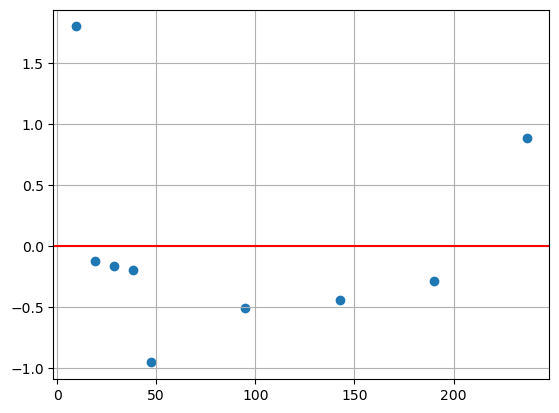

In [23]:
plt.scatter(dan, residuals)
# Добавил нулевой уровень, чтобы было лучше видно разницу относительно нуля
plt.axhline(y=0, color='red', linewidth=1.5)
plt.grid()
plt.show()

Если значение $R^2$ будет близко к нулю, то есть рассмотрение регрессии практически не уменьшает дисперсию выборки (при этом прямая будет практически параллельна оси абсцисс), то можно проверить следуюущю гипотезу:

$H_0$: Среднее не зависит от параметра $X$, то есть регрессия отсутствует.

То есть нам нужно выполнить известный вам $F$-тест для проверки равенства для двух дисперсий: исходной выборки и остатков. Напомним, что в случае справедливости нулевой гипотезы, мы получим $F$-значение, близкое к единице, а $P$-значение будет большим.

In [25]:
import scipy.stats
def fTest(firstSample, secondSample):
    firstSample = np.array(firstSample)
    secondSample = np.array(secondSample)
    f = np.var(firstSample, ddof=1) / np.var(secondSample, ddof=1)
    dfn = firstSample.size - 1
    dfd = secondSample.size - 1
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return (f, p)

In [26]:
fTest(dan, residuals)

(9763.779140432272, 3.885780586188048e-15)

Полученные значения однозначно опровергают нулевую гипотезу.

Ещё раз:
1. Мы построили картинку, увидили там линейную укладку.
2. Вычислили остатки – они оказались малы.
3. Для окончательной уверенности выполнили $F$-тест для проверки дисперсий исходной выборки и остатков.

## Часть 3. Многомерная регрессия.

Возьмём другой фрейм для работы.

In [27]:
dfFlame = pd.read_excel("../Data/Flame.xlsx")

In [28]:
dfFlame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cl       8 non-null      int64
 1   SO4      8 non-null      int64
 2   PO3      8 non-null      int64
 3   Стрелка  8 non-null      int64
dtypes: int64(4)
memory usage: 384.0 bytes


In [29]:
display(dfFlame)

,Cl,SO4,PO3,Стрелка
0,0,0,0,214
1,0,0,20,161
2,0,20,0,185
3,0,20,20,132
4,20,0,0,217
5,20,0,20,162
6,20,20,0,190
7,20,20,20,136


**Легенда к заданию.**

Изучается влияние хлоридов, сульфатов и фосфатов на определение кальцияпламенно-фотометрическим методом:
* **Cl** – содержание хлоридов (%),
* **SO4** – cодержание сульфатов,
* **PO3** – cодержание фосфатов,
* **Стрелка** – отклонение стрелки.

К нашему счастью, нам нужно лишь повторить то, что мы уже делали. 

In [30]:
dfFlameFeatures = dfFlame[['Cl', 'SO4', 'PO3']]
arrow = dfFlame['Стрелка']

In [31]:
model = LinearRegression()
model.fit(dfFlameFeatures, arrow)
R2 = r2_score(arrow, model.predict(dfFlameFeatures))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(R2)

Coefficients: [ 0.1625 -1.3875 -2.6875]
Intercept: 213.75
0.9993872444724345


Мы видим, что коэффициент $R^2$ снова почти что $1$. Следовательно, регрессия объясняет практически весь разброс данных.

## Задача.

Выполнить своё индивидуальное задание.